# 1. Bee Problem

In [28]:
import numpy as np
from scipy.optimize import fsolve

f = lambda x: (2+x)*np.exp(-x)-1;

# Initial guesses for x
x0 = 2

# Solve the system of equations using fsolve (that use methods like Newton's Method)
solution = fsolve(f, x0)

# Print the solution
print("Solution: x =", solution[0])

Solution: x = 1.1461932206205825


# 2. Atmosphere problem

In [33]:
import numpy as np
import scipy.integrate as integrate

R_E = 6.378*10**6;
R_T = R_E + 20000;
R_S = R_E + 50000;

g = 9.80665
M = 0.0289644 # molar mass of dry air
R = 8.31447 # ideal gas constant
L = 0.0065 # temperature lapse

p0 = 101325 # air pressure at sea level (in Pa)
T0 = 288.15 # temperature at sea level (in K)

# TROPOSPHERE

T = lambda y: T0 - L*(y); # Temperature

p_T = lambda y: p0*(1- L*y/T0)**((g*M)/(R*L))
    # air density where y is the altitude from sea level
rho_T = lambda y: (M/(R*T(y)))* p_T(y);
func_T = lambda y: rho_T(y-R_E) * y**2;


# Calculate the mass of the Troposphere

M_T_int = integrate.quad(func_T,R_E, R_T);  # The integral gives two values: the integral and the error estimate
M_T = 4*np.pi *g* M_T_int[0]


# STRATOSPHERE

TS = T(R_T-R_E) # Temperature in the stratosphere
rho_S0 = rho_T(R_T-R_E) # air density at the beginning of the stratosphere

    # air density where y is the distance from the Troposphere-Stratosphere layer
rho_S = lambda y: rho_S0 * np.exp(-(g*M/(R*TS))*(y));
func_S = lambda y: rho_S(y-R_T) * y**2;


M_S_int = integrate.quad(func_S,R_T, R_S);  # The integral gives two values: the integral and the error estimate
M_S = 4*np.pi *g* M_S_int[0]


# RESULT

Matm = M_T + M_S
ME=p0/g*4*np.pi*(R_E**2)
    # sea-level pressure is 101325 Pa = N/m^2
    # Divide by g to get Kg for all the atmosphere above a 1m^2 area on the earth
    # Multiply by the surface area of the Earth


print(f"The mass of Earth's atmosphere is approximately {Matm:.2E} kg")
print(f"The actual mass of Earth's atmosphere is {ME:.2E} kg")
print()
print('Error =',Matm/ME,'times')

The mass of Earth's atmosphere is approximately 5.19E+19 kg
The actual mass of Earth's atmosphere is 5.28E+18 kg

Error = 9.827906873747231 times


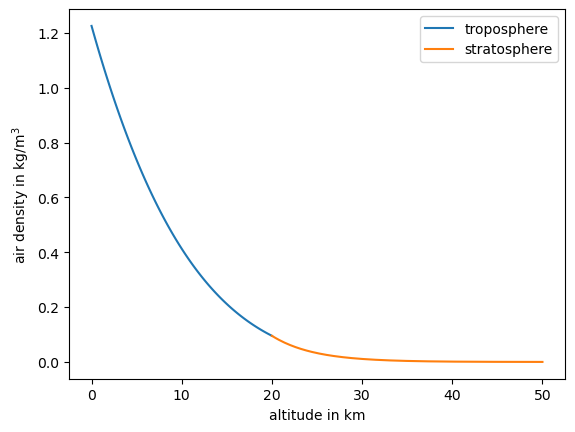

In [34]:
import matplotlib.pyplot as plt

npt_T = 100
npt_S = int(npt_T*(R_S-R_T)/(R_T-R_E))

yT = (np.linspace(R_E,R_T,npt_T)-R_E)/1000
yS = (np.linspace(R_T,R_S,npt_S)-R_E)/1000

plt.plot(yT, rho_T(yT*1000))
plt.plot(yS, rho_S(yS*1000-(R_T-R_E)))
plt.xlabel('altitude in km');
plt.ylabel(r'air density in kg/m$^3$');
plt.legend(['troposphere','stratosphere']);

# plt.plot(yT, func_T(yT))

# plt.plot(yS, func_S(yS))

In [35]:
alt34 = R_E+11000

M34_int = integrate.quad(func_T,R_E, alt34);  # The integral gives two values: the integral and the error estimate
M34 = 4*np.pi *g* M34_int[0]

print(f'The mass of the atmosphere up to 11km makes up {100*M34/Matm:.0f}% of the whole mass.')

The mass of the atmosphere up to 11km makes up 78% of the whole mass.
